**Import modules + libraries**

In [23]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [24]:
# Import the libraries
import functions
import dictionaries

In [25]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [26]:
#read in the Track.h5 file to a pandas dataframe
vmax20=pd.read_hdf('Save/Track_vmax20.h5','table')
vmax40=pd.read_hdf('Save/Track_vmax40.h5','table')
vmax_60=pd.read_hdf('Save/Track_vmax60.h5','table')
vmax_70=pd.read_hdf('Save/Track_vmax70.h5','table')
vmax_80=pd.read_hdf('Save/Track_vmax80.h5','table')
vmax_100=pd.read_hdf('Save/Track_vmax100.h5','table')

#convert ['timestr'] column to datetime in dataframe
vmax20.timestr=vmax20.timestr.astype(str)
vmax20['datetime'] = pd.to_datetime(vmax20.timestr.str.split(',\s*').str[0])
set(vmax20['datetime'])

vmax40.timestr=vmax40.timestr.astype(str)
vmax40['datetime'] = pd.to_datetime(vmax40.timestr.str.split(',\s*').str[0])
set(vmax40['datetime'])

vmax_60.timestr=vmax_60.timestr.astype(str)
vmax_60['datetime'] = pd.to_datetime(vmax_60.timestr.str.split(',\s*').str[0])
set(vmax_60['datetime'])

vmax_70.timestr=vmax_70.timestr.astype(str)
vmax_70['datetime'] = pd.to_datetime(vmax_70.timestr.str.split(',\s*').str[0])
set(vmax_70['datetime'])

vmax_80.timestr=vmax_80.timestr.astype(str)
vmax_80['datetime'] = pd.to_datetime(vmax_80.timestr.str.split(',\s*').str[0])
set(vmax_80['datetime'])

vmax_100.timestr=vmax_100.timestr.astype(str)
vmax_100['datetime'] = pd.to_datetime(vmax_100.timestr.str.split(',\s*').str[0])
set(vmax_100['datetime'])

{Timestamp('1998-01-01 00:30:00'),
 Timestamp('1998-01-01 01:30:00'),
 Timestamp('1998-01-01 02:30:00'),
 Timestamp('1998-01-01 03:30:00'),
 Timestamp('1998-01-01 04:30:00'),
 Timestamp('1998-01-01 05:30:00'),
 Timestamp('1998-01-01 06:30:00'),
 Timestamp('1998-01-01 07:30:00'),
 Timestamp('1998-01-01 08:30:00'),
 Timestamp('1998-01-01 09:30:00'),
 Timestamp('1998-01-01 10:30:00'),
 Timestamp('1998-01-01 11:30:00'),
 Timestamp('1998-01-01 12:30:00'),
 Timestamp('1998-01-01 13:30:00'),
 Timestamp('1998-01-01 14:30:00'),
 Timestamp('1998-01-01 15:30:00'),
 Timestamp('1998-01-01 16:30:00'),
 Timestamp('1998-01-01 17:30:00'),
 Timestamp('1998-01-01 18:30:00'),
 Timestamp('1998-01-01 19:30:00'),
 Timestamp('1998-01-01 20:30:00'),
 Timestamp('1998-01-01 21:30:00'),
 Timestamp('1998-01-01 22:30:00'),
 Timestamp('1998-01-01 23:30:00'),
 Timestamp('1998-01-02 00:30:00'),
 Timestamp('1998-01-02 01:30:00'),
 Timestamp('1998-01-02 02:30:00'),
 Timestamp('1998-01-02 03:30:00'),
 Timestamp('1998-01-

In [27]:
vmax20

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,2,106.094677,542.929600,31239,240,1,1998-01-01 00:30:00,1998-01-01 00:30:00,-35.743217,-63.051313,296.948687,296.948687,1,0 days 00:00:00,1998-01-01 00:30:00
1,0,8,434.854273,747.635519,28419,240,2,1998-01-01 00:30:00,1998-01-01 00:30:00,-22.428452,-54.760701,305.239299,305.239299,-1,0 days 00:00:00,1998-01-01 00:30:00
2,0,20,533.697618,937.641720,10675,240,3,1998-01-01 00:30:00,1998-01-01 00:30:00,-18.425296,-47.065463,312.934537,312.934537,-1,0 days 00:00:00,1998-01-01 00:30:00
3,0,73,723.607307,647.238123,15813,240,4,1998-01-01 00:30:00,1998-01-01 00:30:00,-10.733954,-58.826813,301.173187,301.173187,-1,0 days 00:00:00,1998-01-01 00:30:00
4,0,81,702.458527,876.074455,6735,240,5,1998-01-01 00:30:00,1998-01-01 00:30:00,-11.590480,-49.558936,310.441064,310.441064,-1,0 days 00:00:00,1998-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,167,167,873.686757,203.177217,40809,240,1889,1998-01-07 23:30:00,1998-01-07 23:30:00,-4.655738,-76.811274,283.188726,283.188726,-1,6 days 23:00:00,1998-01-07 23:30:00
1889,167,178,873.231664,530.692947,13482,240,1890,1998-01-07 23:30:00,1998-01-07 23:30:00,-4.674169,-63.546889,296.453111,296.453111,-1,6 days 23:00:00,1998-01-07 23:30:00
1890,167,218,939.770047,25.936128,3772,240,1891,1998-01-07 23:30:00,1998-01-07 23:30:00,-1.979364,-83.989525,276.010475,276.010475,647,0 days 14:00:00,1998-01-07 23:30:00
1891,167,228,973.725734,453.922958,5480,240,1892,1998-01-07 23:30:00,1998-01-07 23:30:00,-0.604159,-66.656074,293.343926,293.343926,-1,6 days 23:00:00,1998-01-07 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [28]:
#vmax20K threshold
init_hours_vmax20 = functions.get_mcs_init(vmax20)
init_hours_vmax20 = np.array(init_hours_vmax20)
init_hours_vmax20, bins = np.histogram(init_hours_vmax20, bins = np.arange(0,25))

diss_hours_vmax20 = functions.get_mcs_diss(vmax20)
diss_hours_vmax20 = np.array(diss_hours_vmax20)
diss_hours_vmax20, bins = np.histogram(diss_hours_vmax20, bins = np.arange(0,25))

init_vmax20 = init_hours_vmax20/np.nansum(init_hours_vmax20) * 100
diss_vmax20 = diss_hours_vmax20/np.nansum(diss_hours_vmax20) * 100

#vmax40K threshold
init_hours_vmax40 = functions.get_mcs_init(vmax40)
init_hours_vmax40 = np.array(init_hours_vmax40)
init_hours_vmax40, bins = np.histogram(init_hours_vmax40, bins = np.arange(0,25))

diss_hours_vmax40 = functions.get_mcs_diss(vmax40)
diss_hours_vmax40 = np.array(diss_hours_vmax40)
diss_hours_vmax40, bins = np.histogram(diss_hours_vmax40, bins = np.arange(0,25))

init_vmax40 = init_hours_vmax40/np.nansum(init_hours_vmax40) * 100
diss_vmax40 = diss_hours_vmax40/np.nansum(diss_hours_vmax40) * 100

#vmax60K threshold
init_hours_vmax60 = functions.get_mcs_init(vmax_60)
init_hours_vmax60 = np.array(init_hours_vmax60)
init_hours_vmax60, bins = np.histogram(init_hours_vmax60, bins = np.arange(0,25))

diss_hours_vmax60 = functions.get_mcs_diss(vmax_60)
diss_hours_vmax60 = np.array(diss_hours_vmax60)
diss_hours_vmax60, bins = np.histogram(diss_hours_vmax60, bins = np.arange(0,25))

init_vmax60 = init_hours_vmax60/np.nansum(init_hours_vmax60) * 100
diss_vmax60 = diss_hours_vmax60/np.nansum(diss_hours_vmax60) * 100

#vmax70K threshold
init_hours_vmax70 = functions.get_mcs_init(vmax_70)
init_hours_vmax70 = np.array(init_hours_vmax70)
init_hours_vmax70, bins = np.histogram(init_hours_vmax70, bins = np.arange(0,25))

diss_hours_vmax70 = functions.get_mcs_diss(vmax_70)
diss_hours_vmax70 = np.array(diss_hours_vmax70)
diss_hours_vmax70, bins = np.histogram(diss_hours_vmax70, bins = np.arange(0,25))

init_vmax70 = init_hours_vmax70/np.nansum(init_hours_vmax70) * 100
diss_vmax70 = diss_hours_vmax70/np.nansum(diss_hours_vmax70) * 100

#vmax80K threshold
init_hours_vmax80 = functions.get_mcs_init(vmax_80)
init_hours_vmax80 = np.array(init_hours_vmax80)
init_hours_vmax80, bins = np.histogram(init_hours_vmax80, bins = np.arange(0,25))

diss_hours_vmax80 = functions.get_mcs_diss(vmax_80)
diss_hours_vmax80 = np.array(diss_hours_vmax80)
diss_hours_vmax80, bins = np.histogram(diss_hours_vmax80, bins = np.arange(0,25))

init_vmax80 = init_hours_vmax80/np.nansum(init_hours_vmax80) * 100
diss_vmax80 = diss_hours_vmax80/np.nansum(diss_hours_vmax80) * 100

#vmax100K threshold
init_hours_vmax100 = functions.get_mcs_init(vmax_100)
init_hours_vmax100 = np.array(init_hours_vmax100)
init_hours_vmax100, bins = np.histogram(init_hours_vmax100, bins = np.arange(0,25))

diss_hours_vmax100 = functions.get_mcs_diss(vmax_100)
diss_hours_vmax100 = np.array(diss_hours_vmax100)
diss_hours_vmax100, bins = np.histogram(diss_hours_vmax100, bins = np.arange(0,25))

init_vmax100 = init_hours_vmax100/np.nansum(init_hours_vmax100) * 100
diss_vmax100 = diss_hours_vmax100/np.nansum(diss_hours_vmax100) * 100


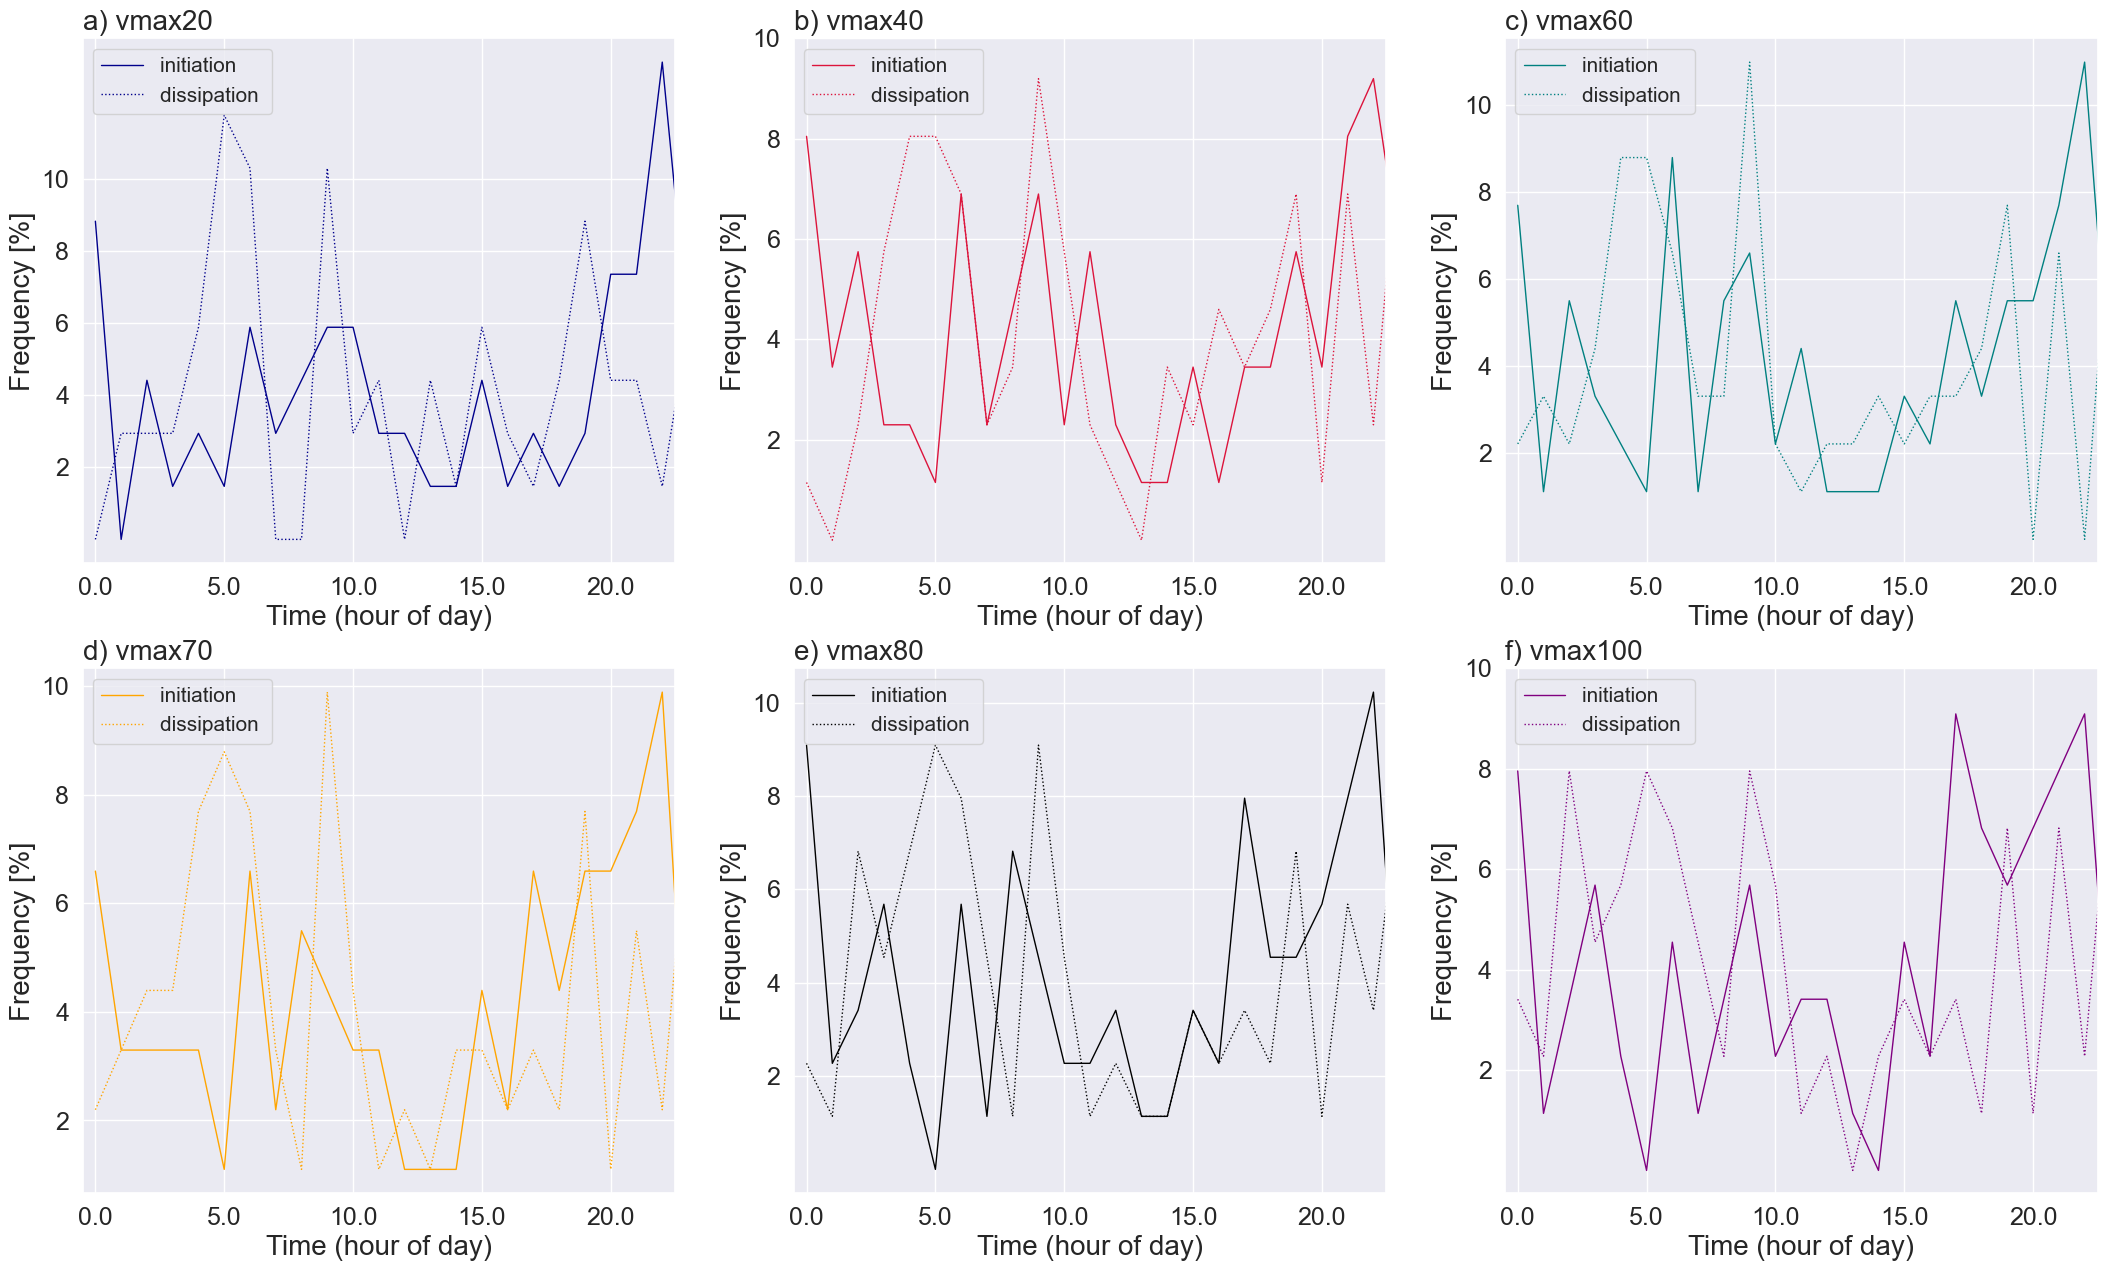

In [29]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('a) vmax20 ', loc='left', fontsize= f )
ax1.plot(np.arange(0,24), init_vmax20, label = 'initiation ', color= 'darkblue', linewidth = 1)
ax1.plot(np.arange(0,24), diss_vmax20, label = 'dissipation ', color= 'darkblue', linewidth = 1, linestyle = 'dotted')
ax1.legend(fontsize=lf)
ax1.set_yticks(np.arange(2,12,2))
ax1.set_yticklabels(ax1.get_yticks(),fontsize=18)
ax1.set_xticklabels(ax1.get_xticks(),fontsize=18)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Time (hour of day)', fontsize= f)
ax1.set_ylabel('Frequency [%]', fontsize= f)

ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('b) vmax40 ', loc='left', fontsize= f )
ax2.plot(np.arange(0,24), init_vmax40, label = 'initiation ', color= 'crimson', linewidth = 1)
ax2.plot(np.arange(0,24), diss_vmax40, label = 'dissipation ', color= 'crimson', linewidth = 1, linestyle = 'dotted')
ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,12,2))
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=18)
ax2.set_xticklabels(ax2.get_xticks(),fontsize=18)
ax2.set_xlabel('Time (hour of day)', fontsize= f)
ax2.set_ylabel('Frequency [%]', fontsize= f)

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('c) vmax60 ', loc='left', fontsize= f )
ax3.plot(np.arange(0,24), init_vmax60, label = 'initiation ', color= 'teal', linewidth = 1)
ax3.plot(np.arange(0,24), diss_vmax60, label = 'dissipation ', color= 'teal', linewidth = 1, linestyle = 'dotted')
ax3.legend(fontsize=lf)
ax3.set_yticks(np.arange(2,12,2))
ax3.set_yticklabels(ax3.get_yticks(),fontsize=18)
ax3.set_xticklabels(ax3.get_xticks(),fontsize=18)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Time (hour of day)', fontsize= f)
ax3.set_ylabel('Frequency [%]', fontsize= f)

ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('d) vmax70', loc='left', fontsize= f )
ax4.plot(np.arange(0,24), init_vmax70, label = 'initiation ', color= 'orange', linewidth = 1)
ax4.plot(np.arange(0,24), diss_vmax70, label = 'dissipation ', color= 'orange', linewidth = 1, linestyle = 'dotted')
ax4.legend(fontsize=lf)
ax4.set_yticks(np.arange(2,12,2))
ax4.set_yticklabels(ax4.get_yticks(),fontsize=18)
ax4.set_xticklabels(ax4.get_xticks(),fontsize=18)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Time (hour of day)', fontsize= f)
ax4.set_ylabel('Frequency [%]', fontsize= f)

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('e) vmax80 ', loc='left', fontsize= f )
ax5.plot(np.arange(0,24), init_vmax80, label = 'initiation ', color= 'black', linewidth = 1)
ax5.plot(np.arange(0,24), diss_vmax80, label = 'dissipation ', color= 'black', linewidth = 1, linestyle = 'dotted')
ax5.legend(fontsize=lf)
ax5.set_yticks(np.arange(2,12,2))
ax5.set_yticklabels(ax5.get_yticks(),fontsize=18)
ax5.set_xticklabels(ax5.get_xticks(),fontsize=18)
ax5.set_xlim(-0.5,22.5)
ax5.set_xlabel('Time (hour of day)', fontsize= f)
ax5.set_ylabel('Frequency [%]', fontsize= f)

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('f) vmax100 ', loc='left', fontsize= f )
ax6.plot(np.arange(0,24), init_vmax100, label = 'initiation ', color= 'purple', linewidth = 1)
ax6.plot(np.arange(0,24), diss_vmax100, label = 'dissipation ', color= 'purple', linewidth = 1, linestyle = 'dotted')
ax6.legend(fontsize=lf)
ax6.set_yticks(np.arange(2,12,2))
ax6.set_yticklabels(ax6.get_yticks(),fontsize=18)
ax6.set_xticklabels(ax6.get_xticks(),fontsize=18)
ax6.set_xlim(-0.5,22.5)
ax6.set_xlabel('Time (hour of day)', fontsize= f)
ax6.set_ylabel('Frequency [%]', fontsize= f)

plt.savefig('Plot/v_max/Init_diss_vmax_Jan1998.png')



In [30]:
init_lats_vmax20, init_lons_vmax20, diss_lats_vmax20, diss_lons_vmax20 = functions.get_init(vmax20)
init_lats_vmax40, init_lons_vmax40, diss_lats_vmax40, diss_lons_vmax40 = functions.get_init(vmax40)
init_lats_vmax60, init_lons_vmax60, diss_lats_vmax60, diss_lons_vmax60 = functions.get_init(vmax_60)
init_lats_vmax70, init_lons_vmax70, diss_lats_vmax70, diss_lons_vmax70 = functions.get_init(vmax_70)
init_lats_vmax80, init_lons_vmax80, diss_lats_vmax80, diss_lons_vmax80 = functions.get_init(vmax_80)
init_lats_vmax100, init_lons_vmax100, diss_lats_vmax100, diss_lons_vmax100 = functions.get_init(vmax_100)




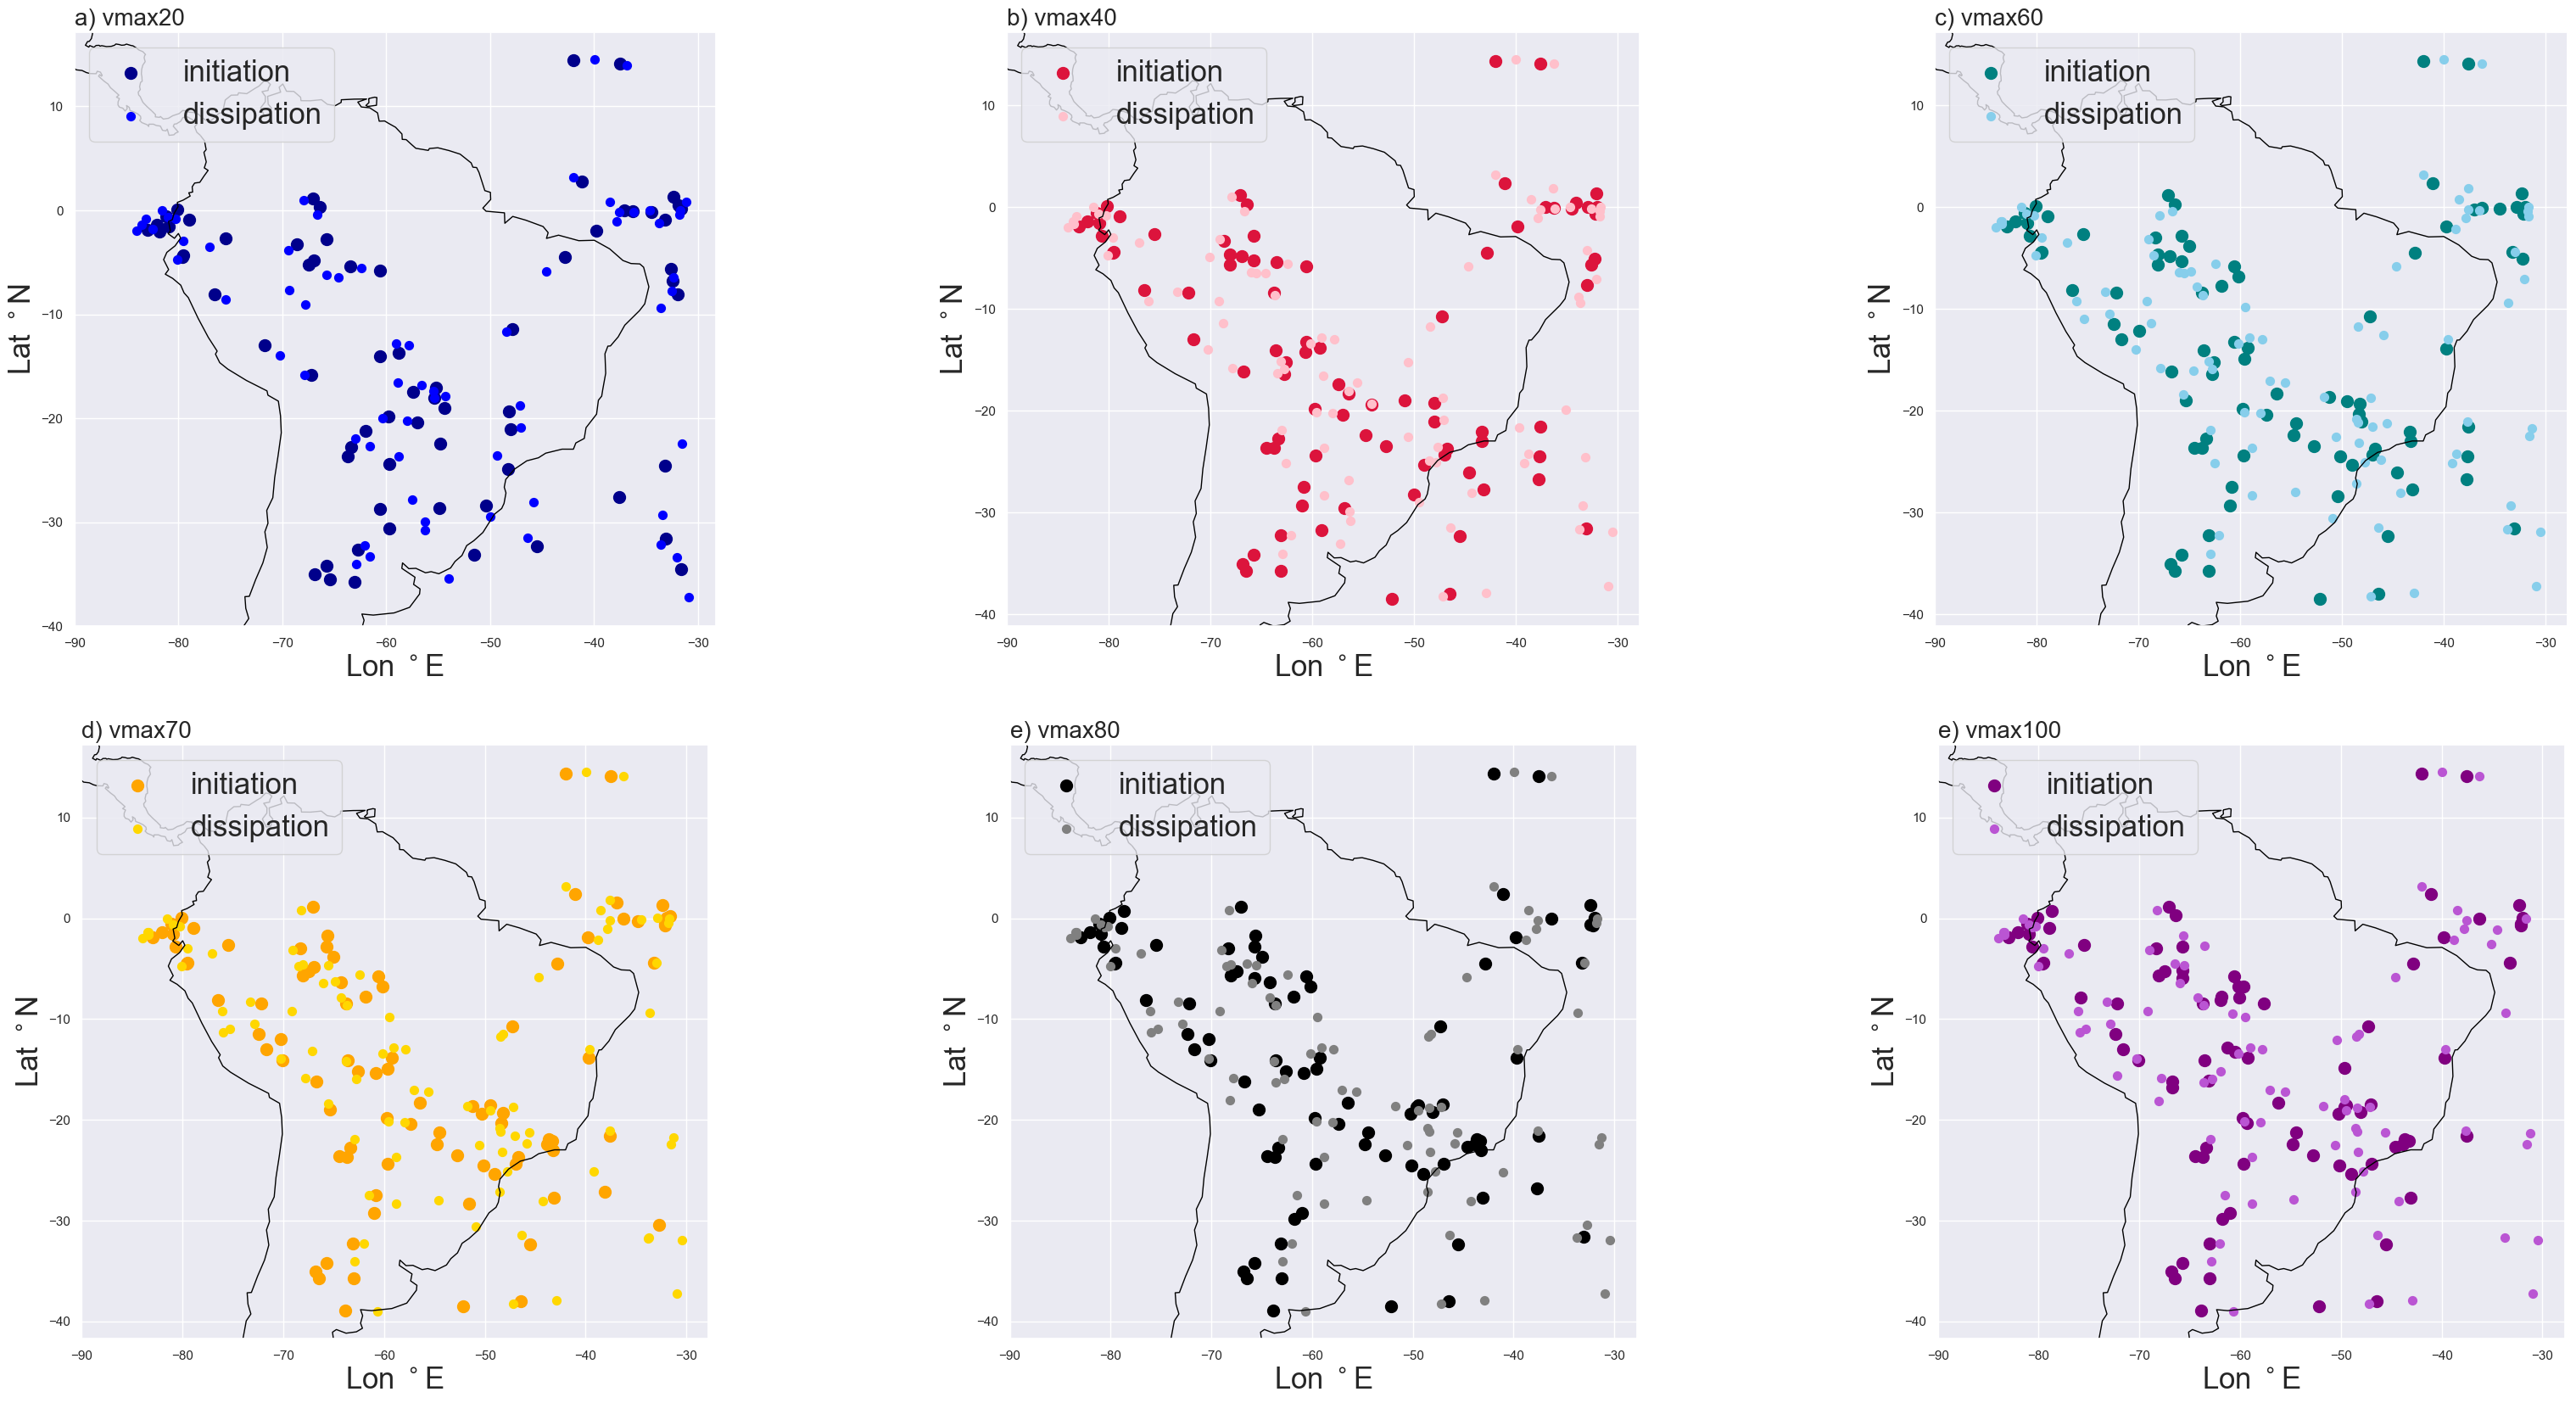

In [31]:
import cartopy.crs as ccrs

plt.figure(figsize=(40,20))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100


# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) vmax20 ', loc='left', fontsize= f )
ax1.scatter(init_lons_vmax20, init_lats_vmax20,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_vmax20, diss_lats_vmax20,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= 25)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) vmax40 ', loc='left', fontsize= f )
ax2.scatter(init_lons_vmax40, init_lats_vmax40,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_vmax40, diss_lats_vmax40,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= 25)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) vmax60 ', loc='left', fontsize= f )
ax3.scatter(init_lons_vmax60, init_lats_vmax60,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_vmax60, diss_lats_vmax60,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= 25)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) vmax70 ', loc='left', fontsize= f )
ax4.scatter(init_lons_vmax70, init_lats_vmax70,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_vmax70, diss_lats_vmax70,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= 25)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.set_title('e) vmax80 ', loc='left', fontsize= f )
ax5.scatter(init_lons_vmax80, init_lats_vmax80,  color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax5.scatter(diss_lons_vmax80, diss_lats_vmax80,  color='grey',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax5.coastlines()
ax5.legend(fontsize= 25)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.set_title('e) vmax100 ', loc='left', fontsize= f )
ax6.scatter(init_lons_vmax100, init_lats_vmax100,  color='purple',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax6.scatter(diss_lons_vmax100, diss_lats_vmax100,  color='mediumorchid',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax6.coastlines()
ax6.legend(fontsize= 25)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=25)

plt.savefig('Plot/v_max/Init_diss_loc_vmax_Jan1998.png')


**MCS area analysis (converts from grid points to area (km2) within function)**

In [32]:
area_vmax20=functions.get_area(vmax20)
area_vmax40=functions.get_area(vmax40)
area_vmax60=functions.get_area(vmax_60)
area_vmax70=functions.get_area(vmax_70)
area_vmax80=functions.get_area(vmax_80)
area_vmax100=functions.get_area(vmax_100)


array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


In [33]:
print(area_vmax20)

[171721.68333333 622056.85714286 586570.5        121165.2
  78352.3125      73821.375      119350.60714286 206145.
 211058.60294118  56710.125      331136.1         63420.10714286
 299854.40625    149485.5         87031.96875     63000.64285714
 103654.6875     231005.76923077 241455.21428571 164028.68181818
 440982.         113752.92857143 109076.625      303059.25
  84408.75       287691.75       152294.175      303906.21428571
 355337.79545455  71266.5         71327.86363636  75195.84375
  59008.5        413355.15       120082.5         55214.15625
  68212.125      640772.25       119434.5         74206.125
  74016.64285714 185584.10294118 201950.55        86285.25
 127378.28571429 119541.27272727 113945.19230769 375613.875
 109883.25        54956.8125      61078.5        497813.34375
 228741.975      195360.42857143 105359.30357143  54194.78571429
 891332.4375      93181.5        170849.25       311535.
 411842.25       122958.          51970.17857143  65382.1875
 389113.875      4

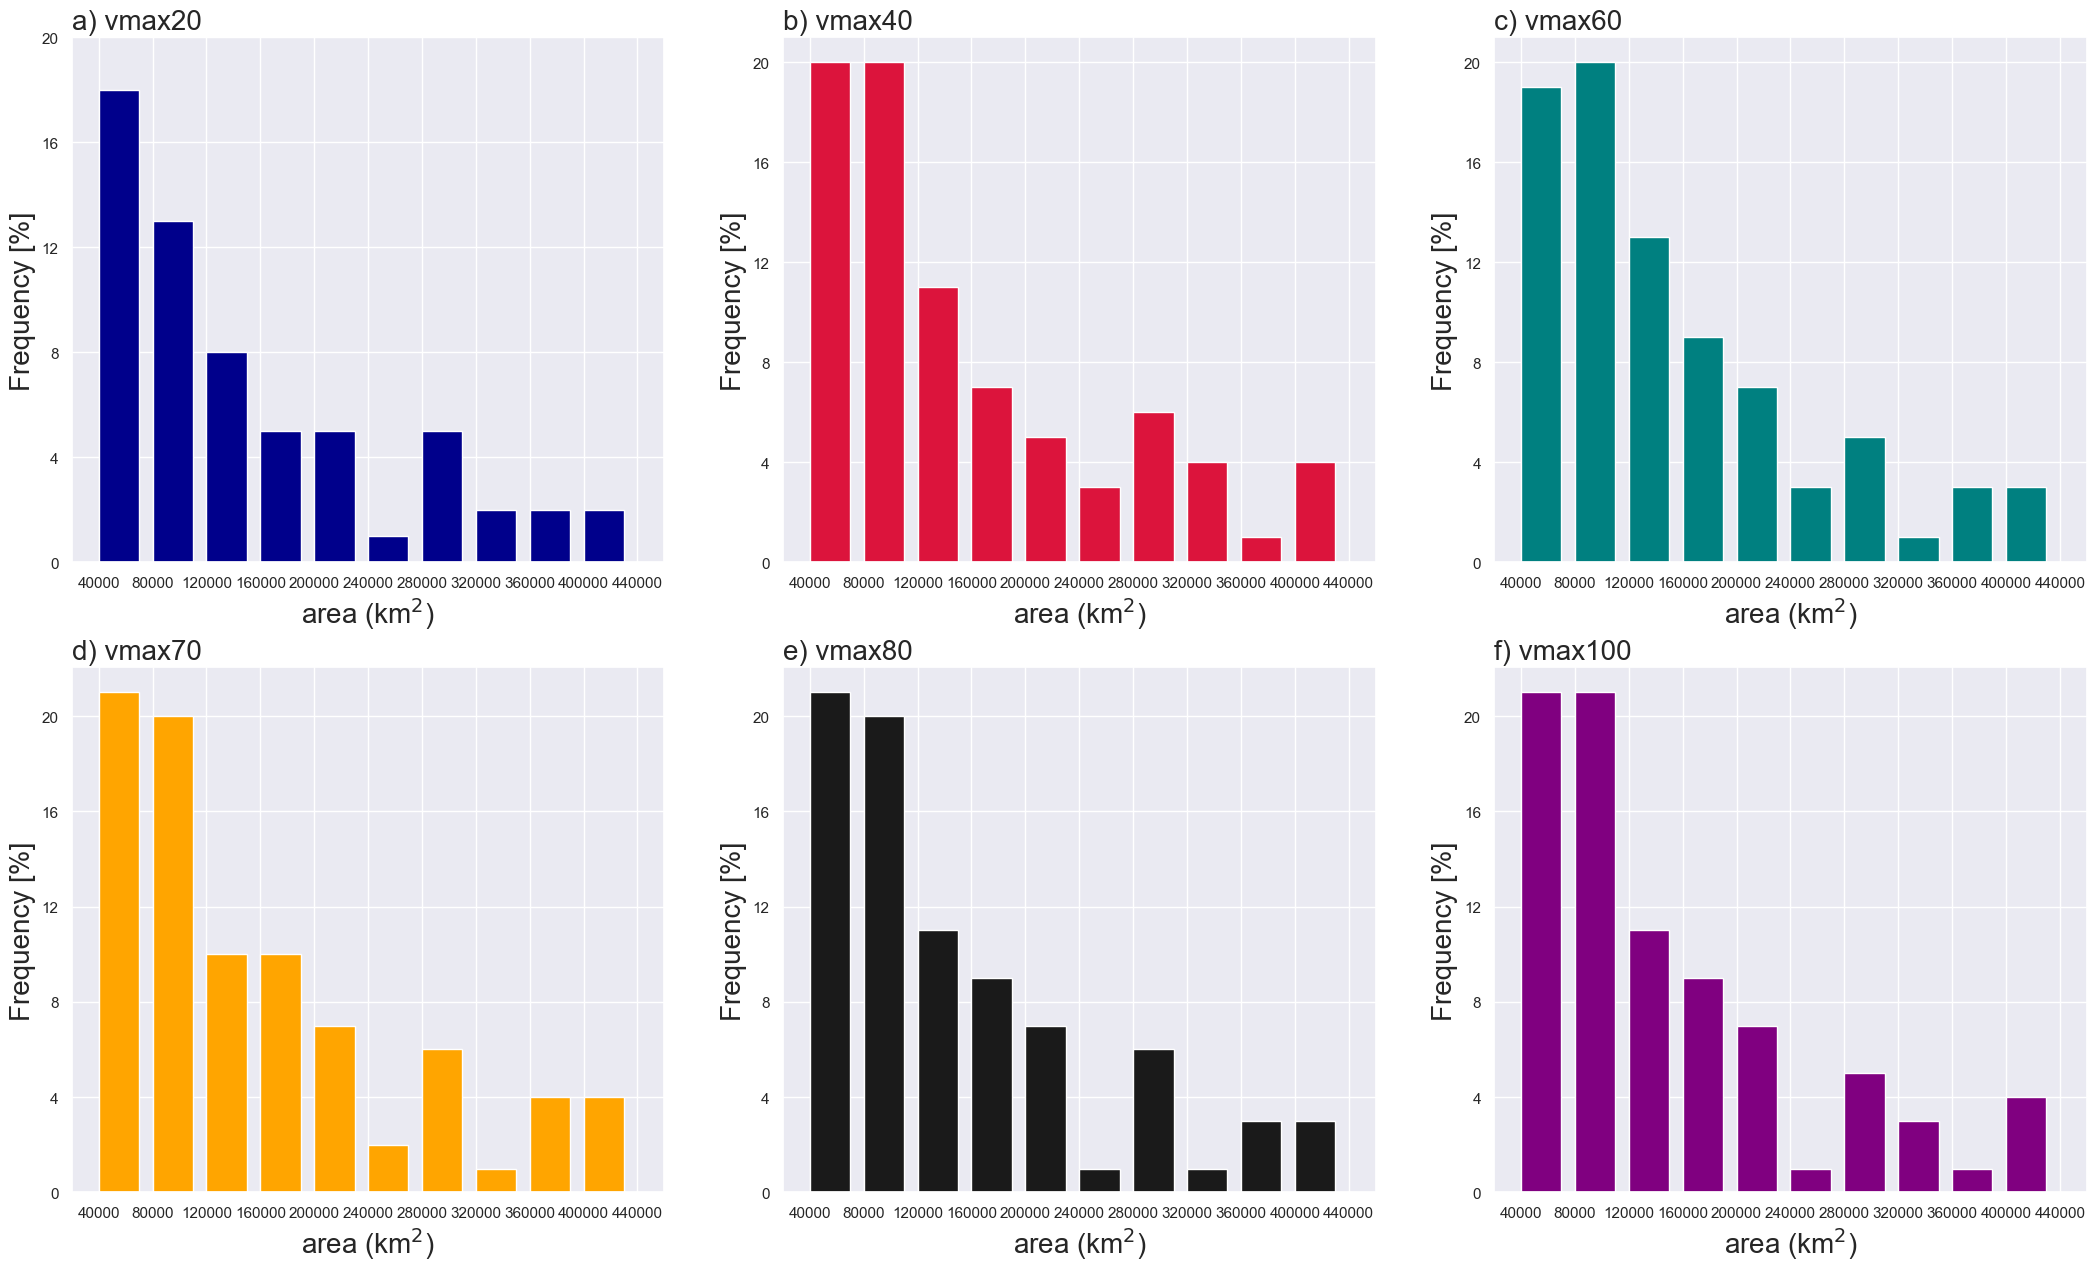

In [36]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1=plt.subplot(2,3,1)
ax1.set_title('a) vmax20 ', loc='left', fontsize= f )
ax1.hist(area_vmax20,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'darkblue')
ax1.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax1.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax1.set_yticks(np.linspace(0,20,6),fontsize=18)
ax1.set_ylabel('Frequency [%]',fontsize=f)

ax2=plt.subplot(2,3,2)
ax2.set_title('b) vmax40 ', loc='left', fontsize= f )
ax2.hist(area_vmax40,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'crimson')
ax2.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax2.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax2.set_yticks(np.linspace(0,20,6),fontsize=18)
ax2.set_ylabel('Frequency [%]',fontsize=f)

ax3=plt.subplot(2,3,3)
ax3.set_title('c) vmax60 ', loc='left', fontsize= f )
ax3.hist(area_vmax60,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'teal')
ax3.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax3.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax3.set_yticks(np.linspace(0,20,6),fontsize=18)
ax3.set_ylabel('Frequency [%]',fontsize=f)

ax4=plt.subplot(2,3,4)
ax4.set_title('d) vmax70 ', loc='left', fontsize= f )
ax4.hist(area_vmax70,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'orange')
ax4.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax4.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax4.set_yticks(np.linspace(0,20,6),fontsize=18)
ax4.set_ylabel('Frequency [%]',fontsize=f)

ax5=plt.subplot(2,3,5)
ax5.set_title('e) vmax80 ', loc='left', fontsize= f )
ax5.hist(area_vmax80,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'k')
ax5.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax5.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax5.set_yticks(np.linspace(0,20,6),fontsize=18)
ax5.set_ylabel('Frequency [%]',fontsize=f)

ax6=plt.subplot(2,3,6)
ax6.set_title('f) vmax100 ', loc='left', fontsize= f )
ax6.hist(area_vmax100,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'purple')
ax6.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax6.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax6.set_yticks(np.linspace(0,20,6),fontsize=18)
ax6.set_ylabel('Frequency [%]',fontsize=f)

plt.savefig('Plot/v_max/area_hist_vmax_Jan1998.png')


**Analysis of MCS velocity/propagation speed**

In [37]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_vmax20= tobac.calculate_velocity(vmax20, method_distance=None)
vel_vmax40= tobac.calculate_velocity(vmax40, method_distance=None)
vel_vmax60= tobac.calculate_velocity(vmax_60, method_distance=None)
vel_vmax70= tobac.calculate_velocity(vmax_70, method_distance=None)
vel_vmax80= tobac.calculate_velocity(vmax_80, method_distance=None)
vel_vmax100= tobac.calculate_velocity(vmax_100, method_distance=None)

In [38]:
velocity_vmax20=functions.get_v(vel_vmax20)
velocity_vmax40=functions.get_v(vel_vmax40)
velocity_vmax60=functions.get_v(vel_vmax60)
velocity_vmax70=functions.get_v(vel_vmax70)
velocity_vmax80=functions.get_v(vel_vmax80)
velocity_vmax100=functions.get_v(vel_vmax100)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [39]:
print(velocity_vmax20)

[        inf 17.98713666  5.15351411  6.21896877  7.90620969  4.47841449
  4.45498104  6.89978339 29.82210716  9.37584929  4.36408906  7.5195146
  7.53545918 17.37738913  4.45770814  7.6361118   3.28310552  8.58561115
  7.24688179 10.66386925  5.72914915  7.23418406  4.74351527  9.22993457
  8.306597    6.2264135   7.97573891 10.34876122  4.38849127  4.4915746
  3.99412336 12.20829895  6.17222549 12.49388352  7.70547625  9.46335248
  7.47269493  7.59638614  9.74839325 12.45123233  6.58622734  6.85601631
 13.28706361 14.21273934  8.72675487  4.90697233 10.56798033  6.68032682
 14.2594635   6.5309886   5.97454821  9.02323211 16.96790006 13.63475397
  6.70894878  5.3936816  11.06832503 11.32368224 10.17307859 13.17438146
 18.75559454  9.10923935 12.21707286  4.68887649 13.18539605  8.62896679
  7.83271771  4.04697627]


In [40]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

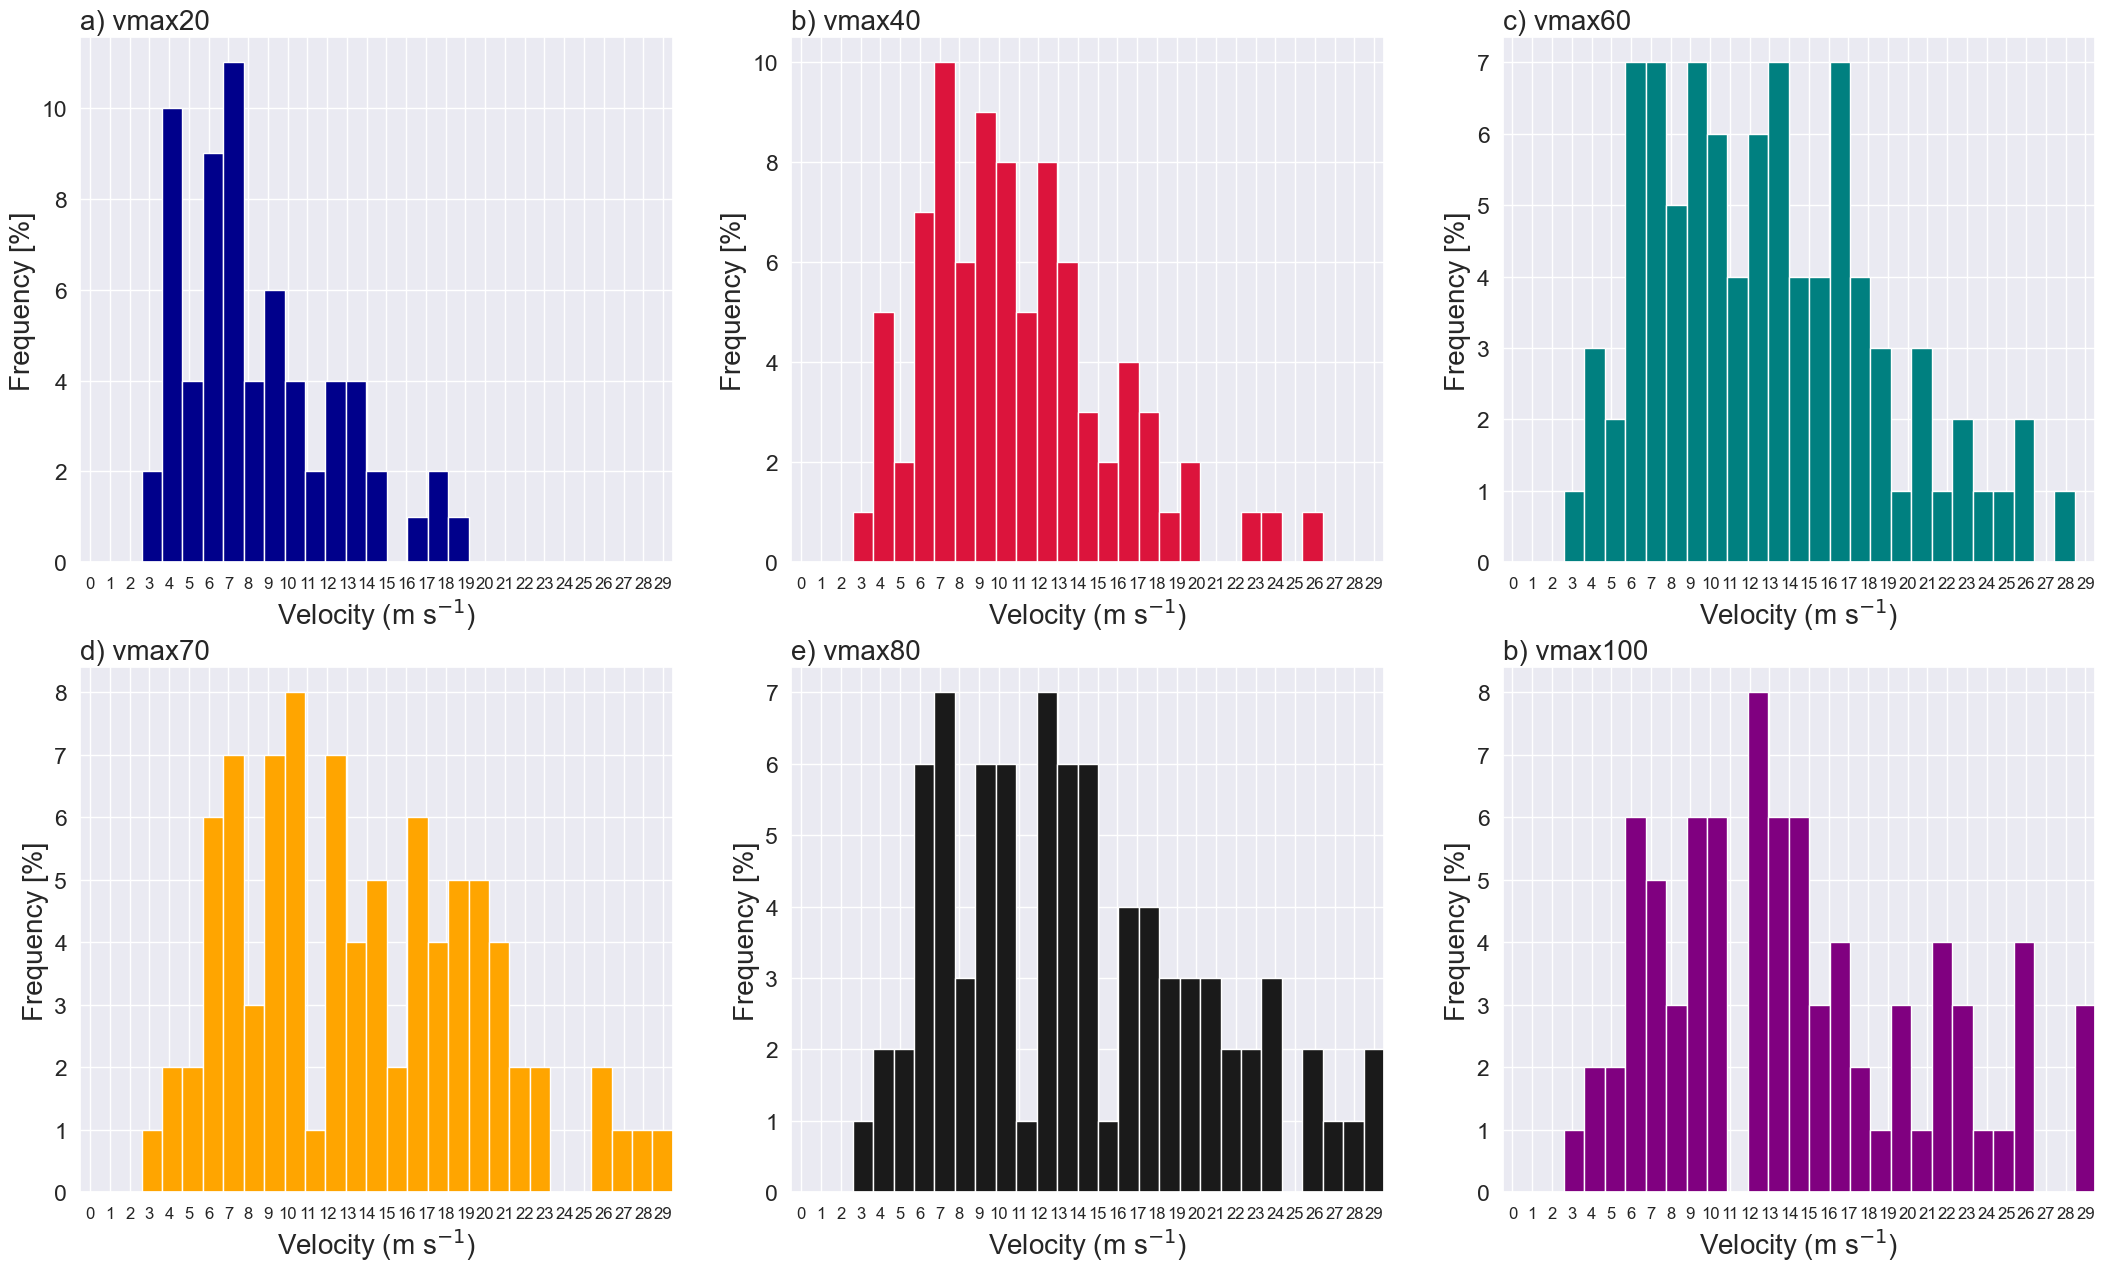

In [42]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) vmax20 ', loc='left', fontsize= f)
bins = range(30)
ax1.hist(velocity_vmax20, bins=bins,align='mid',color='darkblue')
ax1.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) vmax40 ', loc='left', fontsize= f)
bins = range(30)
ax2.hist(velocity_vmax40, bins=bins,align='mid',color='crimson')
ax2.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) vmax60 ', loc='left', fontsize= f)
bins = range(30)
ax3.hist(velocity_vmax60, bins=bins,align='mid',color='teal')
ax3.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) vmax70 ', loc='left', fontsize= f)
bins = range(30)
ax4.hist(velocity_vmax70, bins=bins,align='mid',color='orange')
ax4.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) vmax80 ', loc='left', fontsize= f)
bins = range(30)
ax5.hist(velocity_vmax80, bins=bins,align='mid',color='k')
ax5.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax5.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax6= plt.subplot(2,3,6)
ax6.set_title('b) vmax100 ', loc='left', fontsize= f)
bins = range(30)
ax6.hist(velocity_vmax100, bins=bins,align='mid',color='purple')
ax6.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax6.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

plt.savefig('Plot/v_max/vel_hist_vmax_Jan1998.png')

